In [1]:
import json
import os
from pprint import pprint
import numpy as np

In [2]:
def read_json(json_path, frame_num):
    json_file = os.path.join(json_path, str(frame_num).zfill(6) + '.json')
    f = open(json_file)
    dic = json.load(f)
    nodes = dic['shapes']
    all_points = np.zeros((8,4)).tolist()
    for node in nodes:
        n_name = node['label'].split('_')   # left_1
        if   n_name[0] == 'left' and n_name[1] == '0':
            p = 0
        elif n_name[0] == 'right' and n_name[1] == '0':
            p = 1
        elif n_name[0] == 'joint' and n_name[1] == '0':
            p = 2
        elif n_name[0] == 'em' and n_name[1] == '0':
            p = 3
        elif n_name[0] == 'left' and n_name[1] == '1':
            p = 4
        elif n_name[0] == 'right' and n_name[1] == '1':
            p = 5
        elif n_name[0] == 'joint' and n_name[1] == '1':
            p = 6
        elif n_name[0] == 'em' and n_name[1] == '1':
            p = 7
        all_points[p][0] = n_name[0]    # for name
        all_points[p][1] = n_name[1]    # for tool id
        x = node['points'][0][0]
        all_points[p][2] = x
        y = node['points'][0][1]
        all_points[p][3] = y

    return all_points

In [3]:
def json_check(all_point):
    check = ['right','left','joint','em','end',
             'right','left','joint','em','end']
    for n, node in enumerate(all_point):
        print(node[0],check[n])
        if node[0] != check[n]:
            print('dataset not clean')
            break

    return

In [4]:
read_json('./test_json_data/Annotations', 339)
# all_point.index('right')
# json_check(all_point)

[['left', '0', 615.7480314960629, 473.2283464566929],
 ['right', '0', 618.1102362204724, 520.4724409448819],
 ['joint', '0', 591.3385826771654, 494.48818897637796],
 ['em', '0', 457.89473684210526, 438.1578947368421],
 ['left', '1', 716.5354330708661, 628.3464566929134],
 [0.0, 0.0, 0.0, 0.0],
 ['joint', '1', 738.5826771653543, 600.0],
 ['em', '1', 786.6141732283464, 530.7086614173228]]

In [5]:
import matplotlib.pyplot as plt

In [6]:
def json2point(input_shape, c_x, c_y, sigma):
    img_height = input_shape[0]
    img_width = input_shape[1]
    X1 = np.linspace(1, img_width, img_width)
    Y1 = np.linspace(1, img_height, img_height)
    [X, Y] = np.meshgrid(X1, Y1)
    
    X = X - c_x
    Y = Y - c_y
    D2 = X * X + Y * Y
    E2 = 2.0 * sigma * sigma
    Exponent = D2 / E2
    heatmap = np.exp(-Exponent)
    return heatmap


[[100 100]]
array([[0.01121888, 0.0112179 , 0.01120754, 0.01118785, 0.01115888,
        0.01112071, 0.01107345, 0.01101722, 0.01095216, 0.01087845],
       [0.0112179 , 0.01122549, 0.01122371, 0.01121257, 0.01119211,
        0.01116239, 0.01112349, 0.01107552, 0.01101859, 0.01095284],
       [0.01120754, 0.01122371, 0.01123052, 0.01122798, 0.0112161 ,
        0.01119491, 0.01116448, 0.01112487, 0.0110762 , 0.01101859],
       [0.01118785, 0.01121257, 0.01122798, 0.01123406, 0.01123079,
        0.0112182 , 0.0111963 , 0.01116517, 0.01112487, 0.01107552],
       [0.01115888, 0.01119211, 0.0112161 , 0.01123079, 0.01123616,
        0.01123219, 0.01121889, 0.0111963 , 0.01116448, 0.01112349],
       [0.01112071, 0.01116239, 0.01119491, 0.0112182 , 0.01123219,
        0.01123686, 0.01123219, 0.0112182 , 0.01119491, 0.01116239],
       [0.01107345, 0.01112349, 0.01116448, 0.0111963 , 0.01121889,
        0.01123219, 0.01123616, 0.01123079, 0.0112161 , 0.01119211],
       [0.01101722, 0.0110755

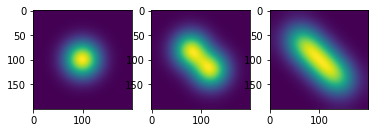

In [15]:
h = 200
w = 200
c = 1
cx = int(np.round(w/2))
cy = int(np.round(h/2))

heatmap = json2point([h, w], cx, cy, 25)
# pprint(heatmap)

from scipy.ndimage import gaussian_filter
import cv2

b = np.zeros((c, h, w))
# cv2.circle(b, (cx, cy), 1 , 1, cv2.FILLED)
# b[0,cx,cy]=1
b[0,cx+20,cy+20]=1
b[0,cx-20,cy-20]=1

b = gaussian_filter(b, 25)
maxi = np.amax(b)
# print(maxi)
b = b * 1/maxi
from skimage.feature import peak_local_max
maxi=peak_local_max(b[0], min_distance=5)
# print(maxi.shape)
# print(b[0,maxi[0,0],maxi[0,1]])
# print(b[0,maxi[1,0],maxi[1,1]])

c = np.zeros((h,w))
cv2.line(c, (cx-50,cy-50),(cx+50,cy+50),1,1)
c = gaussian_filter(c, 25)
maxi=peak_local_max(c, min_distance=5)
print(maxi)
pprint(c[95:105,95:105])

plt.subplot(1,3,1)
# plt.imshow(heatmap[200:300, 200:300])
plt.imshow(heatmap)


plt.subplot(1,3,2)
# plt.imshow(b[200:300, 200:300])
plt.imshow(b[0,:,:])


plt.subplot(1,3,3)
plt.imshow(c)

plt.show()

In [204]:
# pprint(b[248:252, 248:252])
pprint(b[0,95:105,95:105])

array([[0.00042237, 0.0004244 , 0.00042586, 0.00042675, 0.00042707,
        0.00042681, 0.00042598, 0.00042458, 0.00042261, 0.00042009],
       [0.0004244 , 0.00042654, 0.00042812, 0.00042912, 0.00042955,
        0.0004294 , 0.00042867, 0.00042737, 0.0004255 , 0.00042307],
       [0.00042586, 0.00042812, 0.00042981, 0.00043093, 0.00043147,
        0.00043143, 0.00043081, 0.00042961, 0.00042784, 0.0004255 ],
       [0.00042675, 0.00042912, 0.00043093, 0.00043216, 0.00043281,
        0.00043288, 0.00043237, 0.00043127, 0.00042961, 0.00042737],
       [0.00042707, 0.00042955, 0.00043147, 0.00043281, 0.00043357,
        0.00043375, 0.00043335, 0.00043237, 0.00043081, 0.00042867],
       [0.00042681, 0.0004294 , 0.00043143, 0.00043288, 0.00043375,
        0.00043404, 0.00043375, 0.00043288, 0.00043143, 0.0004294 ],
       [0.00042598, 0.00042867, 0.00043081, 0.00043237, 0.00043335,
        0.00043375, 0.00043357, 0.00043281, 0.00043147, 0.00042955],
       [0.00042458, 0.00042737, 0.0004296

In [192]:
# pprint(heatmap[248:252, 248:252])
pprint(heatmap)

array([[1.54727551e-07, 1.81139207e-07, 2.11720252e-07, ...,
        1.81139207e-07, 1.54727551e-07, 1.31955644e-07],
       [1.81139207e-07, 2.12059275e-07, 2.47860438e-07, ...,
        2.12059275e-07, 1.81139207e-07, 1.54480185e-07],
       [2.11720252e-07, 2.47860438e-07, 2.89705774e-07, ...,
        2.47860438e-07, 2.11720252e-07, 1.80560488e-07],
       ...,
       [1.81139207e-07, 2.12059275e-07, 2.47860438e-07, ...,
        2.12059275e-07, 1.81139207e-07, 1.54480185e-07],
       [1.54727551e-07, 1.81139207e-07, 2.11720252e-07, ...,
        1.81139207e-07, 1.54727551e-07, 1.31955644e-07],
       [1.31955644e-07, 1.54480185e-07, 1.80560488e-07, ...,
        1.54480185e-07, 1.31955644e-07, 1.12535175e-07]])


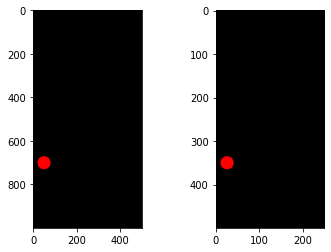

In [61]:
h = 1000
w = 500
cx = 50
cy = 700

a = np.zeros((h, w, 3))
cv2.circle(a, (cx, cy), 30 , 1, cv2.FILLED)
plt.subplot(1,2,1)
plt.imshow(a)


b = cv2.resize(a, (int(w/2),int(h/2)))
cxb = int(np.round(0.5 * cx))
cyb = int(np.round(0.5 * cy))
cv2.circle(b, (cxb, cyb), 15 , 1, cv2.FILLED)
plt.subplot(1,2,2)
plt.imshow(b)

In [52]:
a=np.zeros((3,2,2))
a[1,:,:]

array([[0., 0.],
       [0., 0.]])